<a href="https://colab.research.google.com/github/sobiya1234/Machine-Learning/blob/main/ML_Assignment_6_Supervised_Model_Comparison_and_k_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1.	Initial Exploration and Pre-Processing

1.1.	Load the dataset and perform an initial exploration to understand its structure and content.

In [ ]:
csvfile='https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/Life%20Expectancy%20Data.csv'
df=pd.read_csv(csvfile)

In [ ]:
df.shape

(2938, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


1.2.	Determine the number of unique values in the 'Country' and 'Year' columns.

In [ ]:
df['Country'].nunique()

193

In [ ]:
df['Year'].nunique()

16

In [ ]:
print("Unique countries:", df['Country'].nunique())
print("Unique years:", df['Year'].nunique())

Unique countries: 193
Unique years: 16


1.3.	Analyze the distribution of values in the 'Status' column. If the dataset is imbalanced, consider using appropriate metrics for evaluation.

In [ ]:
df['Status'].value_counts()

,count
Status,
Developing,2426
Developed,512


In [ ]:
df['Status'].value_counts(normalize=True)*100

,proportion
Status,
Developing,82.573179
Developed,17.426821


In [ ]:
print("status_distribution:", df['Status'].value_counts())
print("status_percentage:", df['Status'].value_counts(normalize=True)*100)

status_distribution: Status
Developing    2426
Developed      512
Name: count, dtype: int64
status_percentage: Status
Developing    82.573179
Developed     17.426821
Name: proportion, dtype: float64


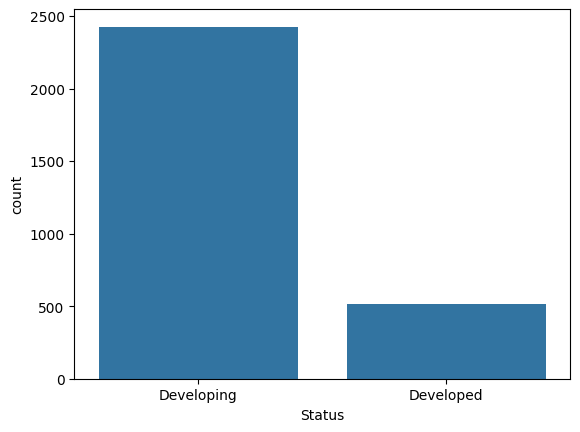

In [ ]:
df['Status'].value_counts()
sns.countplot(x='Status', data=df)
plt.show()

1.4.	Check for any missing values. Impute missing values for all numerical columns using the median or another suitable strategy.

In [ ]:
print("\nMissing values in each column:")
missing_values = df.isnull().sum()
missing_values


Missing values in each column:


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
cols_to_fil_mode=['Life expectancy ', 'Adult Mortality','Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure',
                  'Diphtheria ', 'GDP', 'Population',' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources', 'Schooling']

In [ ]:
for col in cols_to_fil_mode:
  df[col]=df[col].fillna(df[col].mode()[0])

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


1.5.	Optionally, you may perform a comprehensive EDA to visualize relationships, distributions, and patterns in the data.

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,2938,193,Afghanistan,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2938.0,NaN,NaN,NaN,2007.51872,4.613841,2000.0,2004.0,2008.0,2012.0,2015.0
Status,2938,2,Developing,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life expectancy,2938.0,NaN,NaN,NaN,69.237781,9.510183,36.3,63.2,72.1,75.6,89.0
Adult Mortality,2938.0,NaN,NaN,NaN,164.276378,124.399126,1.0,73.0,144.0,227.0,723.0
infant deaths,2938.0,NaN,NaN,NaN,30.303948,117.926501,0.0,0.0,3.0,22.0,1800.0
Alcohol,2938.0,NaN,NaN,NaN,4.299588,4.079052,0.01,0.47,3.13,7.39,17.87
percentage expenditure,2938.0,NaN,NaN,NaN,738.251295,1987.914858,0.0,4.685343,64.912906,441.534144,19479.91161
Hepatitis B,2938.0,NaN,NaN,NaN,84.339687,23.664672,1.0,82.0,95.0,99.0,99.0
Measles,2938.0,NaN,NaN,NaN,2419.59224,11467.272489,0.0,0.0,17.0,360.25,212183.0


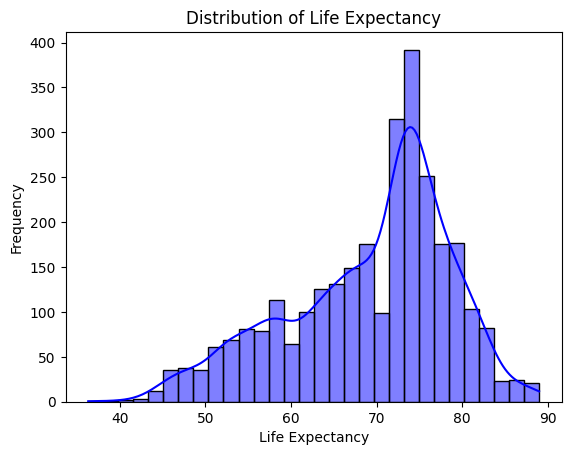

In [ ]:
sns.histplot(df['Life expectancy '], bins=30, kde=True, color='blue')
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

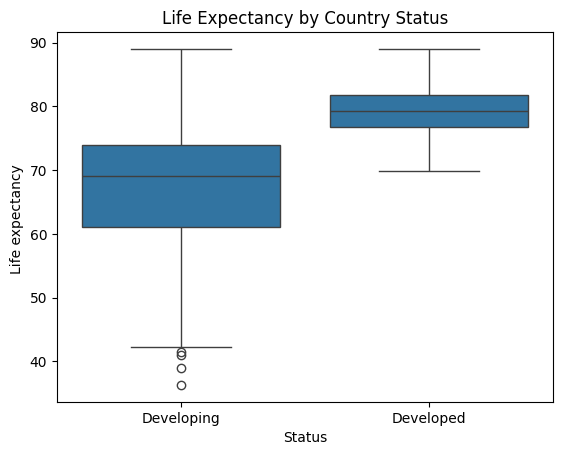

In [ ]:
sns.boxplot(x='Status', y='Life expectancy ', data=df)
plt.title("Life Expectancy by Country Status")
plt.show()

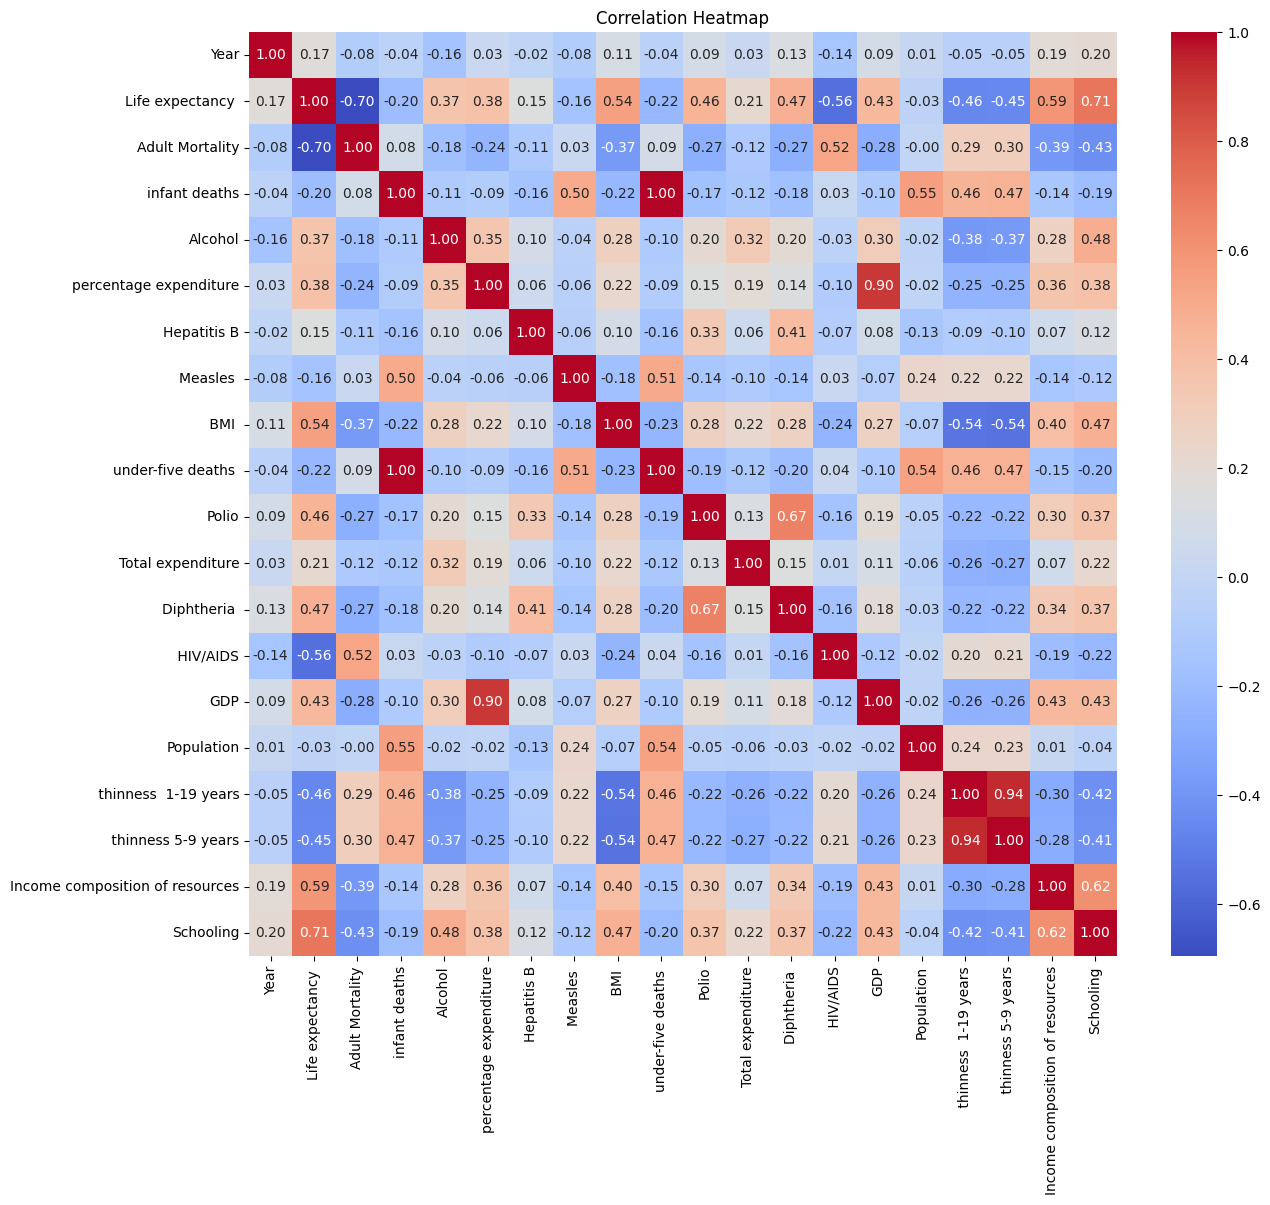

In [ ]:
plt.figure(figsize=(14, 12))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

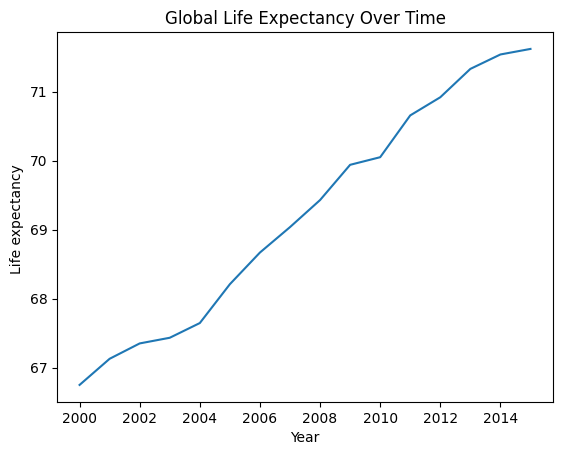

In [ ]:
sns.lineplot(data=df.groupby('Year')['Life expectancy '].mean().reset_index(),
             x='Year', y='Life expectancy ')
plt.title("Global Life Expectancy Over Time")
plt.show()

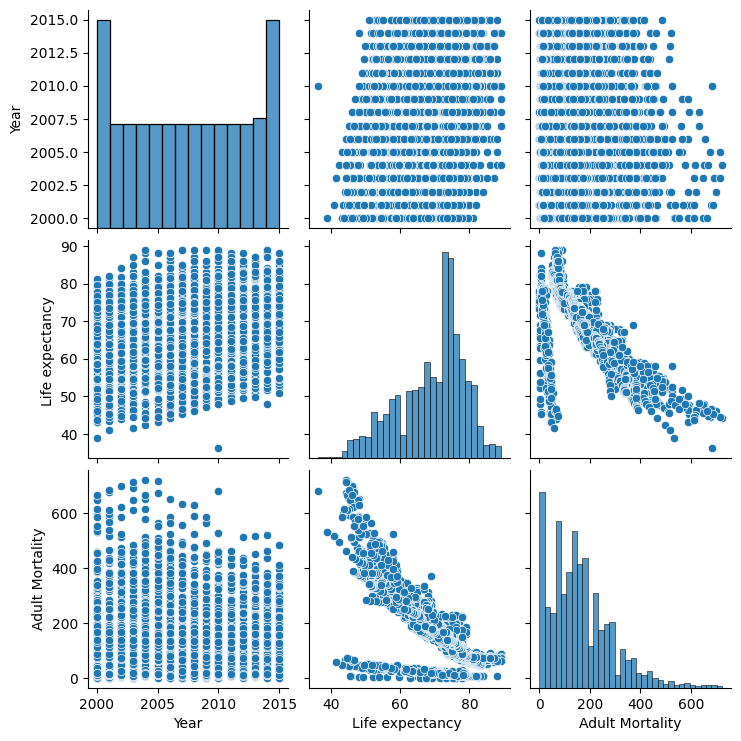

In [ ]:
sns.pairplot(df.select_dtypes(include=np.number).iloc[:, :3])
plt.show()

1.6.	Encode categorical columns appropriately.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode 'Status' using LabelEncoder (binary)
le_status = LabelEncoder()
df['Status'] = le_status.fit_transform(df['Status'])

# Encode 'Country' using LabelEncoder
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])

# Show the encoded columns
df[['Status']].head()

,Status
0,1
1,1
2,1
3,1
4,1


#2.	Classification Models Comparison

2.1.	Define 'Status' as the target variable and use all other columns as features.

In [ ]:
target = 'Status'
features = df.drop(columns=[target])

In [ ]:
X = features
y = df[target]

# Show shapes and first few values
X_shape = X.shape
y_shape = y.shape
X_head = X.head()
y_head = y.head()

In [ ]:
X_shape, y_shape

((2938, 21), (2938,))

In [ ]:
X_head, y_head

(   Country  Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
 0        0  2015              65.0            263.0             62     0.01   
 1        0  2014              59.9            271.0             64     0.01   
 2        0  2013              59.9            268.0             66     0.01   
 3        0  2012              59.5            272.0             69     0.01   
 4        0  2011              59.2            275.0             71     0.01   
 
    percentage expenditure  Hepatitis B  Measles    BMI   ...  Polio  \
 0               71.279624         65.0      1154   19.1  ...    6.0   
 1               73.523582         62.0       492   18.6  ...   58.0   
 2               73.219243         64.0       430   18.1  ...   62.0   
 3               78.184215         67.0      2787   17.6  ...   67.0   
 4                7.097109         68.0      3013   17.2  ...   68.0   
 
    Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
 0         

2.2.	Split the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X-Training set size:", X_train.shape)
print("X-Testing set size:", X_test.shape)
print("y-Training set size:", y_train.shape)
print("y-Testing set size:", y_test.shape)

X-Training set size: (2350, 21)
X-Testing set size: (588, 21)
y-Training set size: (2350,)
y-Testing set size: (588,)


2.3.	Scale all feature columns, excluding 'Country' and 'Year'.

In [ ]:
# Exclude 'Country' and 'Year' from scaling
cols_to_exclude = ['Country', 'Year']
cols_to_scale = [col for col in X.columns if col not in cols_to_exclude]

# Fit on training data and transform both training and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

2.4.	Compare classification models including Logistic Regression, K-Neighbors Classifier, Decision Tree Classifier, Random Forest Classifier, Support Vector Classifier, Gaussian Naive Bayes, and XGBoost. Report both accuracy and F1-scores for each model. Optionally, you may perform hyperparameter tuning to optimize model performance.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_absolute_error

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1 Score': round(f1, 4)
    })

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:05:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Convert to DataFrame for display
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(results_df)

                  Model  Accuracy  F1 Score
6               XGBoost    0.9949    0.9969
3         Random Forest    0.9864    0.9919
1   K-Nearest Neighbors    0.9694    0.9818
2         Decision Tree    0.9694    0.9814
0   Logistic Regression    0.9303    0.9578
4                   SVC    0.8350    0.9101
5  Gaussian Naive Bayes    0.7755    0.8462


2.5.	Identify and report the best-performing classification model for this dataset.

In [ ]:
best_model = results_df.iloc[0]

In [ ]:
best_model = results_df.iloc[0]
print("Best Model:", best_model)

Best Model: Model       XGBoost
Accuracy     0.9949
F1 Score     0.9969
Name: 6, dtype: object


In [ ]:
print(results_df)

                  Model  Accuracy  F1 Score
6               XGBoost    0.9949    0.9969
3         Random Forest    0.9864    0.9919
1   K-Nearest Neighbors    0.9694    0.9818
2         Decision Tree    0.9694    0.9814
0   Logistic Regression    0.9303    0.9578
4                   SVC    0.8350    0.9101
5  Gaussian Naive Bayes    0.7755    0.8462


#3.	Regression Models Comparison

3.1.	Define 'Life expectancy' as the target variable and use all other columns as features.

In [ ]:
target_col = 'Life expectancy '
X = df.drop(columns=[target_col])
y = df[target_col]

In [ ]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (2938, 21)
Target shape: (2938,)


In [ ]:
print("Feature columns:", X.columns.tolist())

Feature columns: ['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


3.2.	Split the data into training and testing sets.

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2350, 21)
X_test shape: (588, 21)
y_train shape: (2350,)
y_test shape: (588,)


3.3.	Scale all feature columns, excluding 'Country', 'Year', and 'Status'.

In [ ]:
# Columns to scale (excluding 'Country', 'Year', and 'Status')
cols_to_exclude = ['Country', 'Year', 'Status']
cols_to_scale = [col for col in X_train.columns if col not in cols_to_exclude]

In [ ]:
# Scale features
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [ ]:
print("Scaled feature columns (sample):")
print(X_train_scaled[cols_to_scale].head())

Scaled feature columns (sample):
      Adult Mortality  infant deaths   Alcohol  percentage expenditure  \
456         -0.313515      -0.257514  0.244954               -0.192120   
462         -0.106103      -0.257514 -0.116981               -0.291864   
2172        -0.177899      -0.257514  1.512960               -0.369082   
2667        -1.214962      -0.230683 -0.737443               -0.064479   
381         -0.560815      -0.257514 -1.023052                0.113299   

      Hepatitis B  Measles       BMI   under-five deaths      Polio  \
456      0.491669 -0.200110 -0.662085           -0.262215  0.652116   
462      0.619684 -0.200110 -0.831519           -0.262215  0.351976   
2172     0.619684 -0.200110  0.284753           -0.262215  0.694994   
2667     0.577012 -0.198729  1.022291           -0.242595  0.652116   
381      0.619684 -0.200110 -0.537501           -0.262215  0.694994   

      Total expenditure  Diphtheria    HIV/AIDS       GDP  Population  \
456           -0.62875

3.4.	Compare regression models including Linear Regression, Decision Tree Regressor, Random Forest Regressor, Support Vector Regressor, and K-Neighbors Regressor. Report R² score and Mean Absolute Error for each model. Optionally, you may perform hyperparameter tuning to enhance performance.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Define regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

In [ ]:
# Evaluate each model
regression_results = []

for name, model in regression_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    regression_results.append({
        'Model': name,
        'R² Score': round(r2, 4),
        'MAE': round(mae, 4)
    })

In [ ]:
# Convert to DataFrame and sort by R² Score
print("Regression Results:")
regression_results_df = pd.DataFrame(regression_results).sort_values(by="R² Score", ascending=False)
regression_results_df

Regression Results:


,Model,R² Score,MAE
2,Random Forest Regressor,0.9697,1.0167
1,Decision Tree Regressor,0.9260,1.4998
4,K-Neighbors Regressor,0.8676,2.3287
0,Linear Regression,0.8270,2.8535
3,Support Vector Regressor,-0.1192,7.5044


3.5.	Identify and report the best-performing regression model for this dataset.

In [ ]:
best_model = regression_results_df.iloc[0]

In [ ]:
best_model = regression_results_df.iloc[0]
print("Best Model:", best_model)

Best Model: Model       Random Forest Regressor
R² Score                     0.9697
MAE                          1.0167
Name: 2, dtype: object


# **Unsupervised Learning – k-Means**

k-Means Clustering Steps:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

➔	Initial Visualization: Create a scatter plot using 'Annual Income (k$)' on the x-axis and 'Spending Score (1-100)' on the y-axis to visualize the data distribution.

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


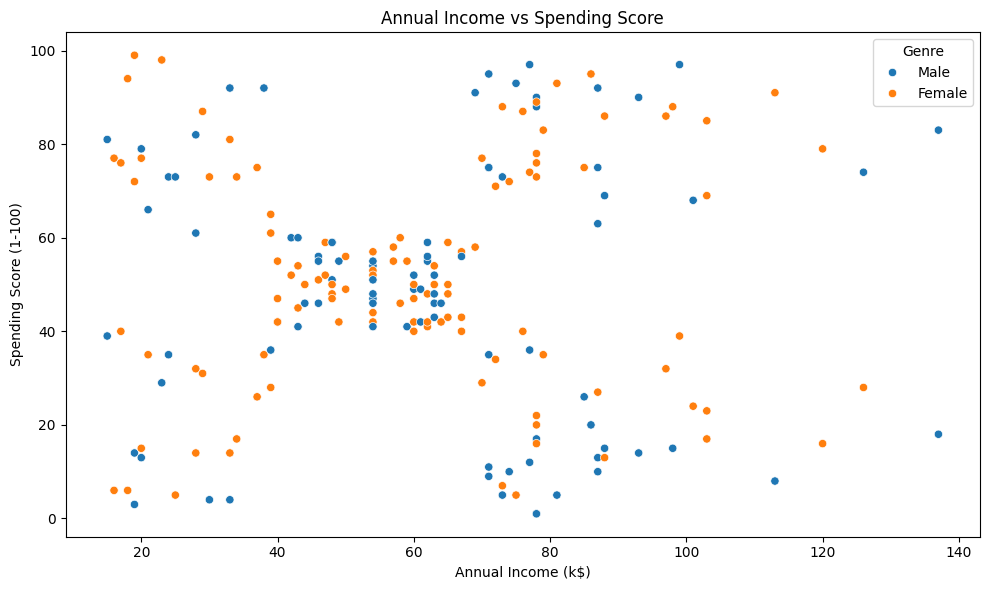

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.tight_layout()
plt.show()

➔	Feature Selection: Select 'Annual Income (k$)' and 'Spending Score (1-100)' as the features for k-Means clustering.

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
print(X[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


➔	Determine Optimal k-Value: Calculate the Within-Cluster Sum of Squares (WCSS) for a range of k-values.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Calculate WCSS for k values from 1 to 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

➔	Plot the Elbow Chart: Plot the elbow method graph to visually determine the optimal k-value.

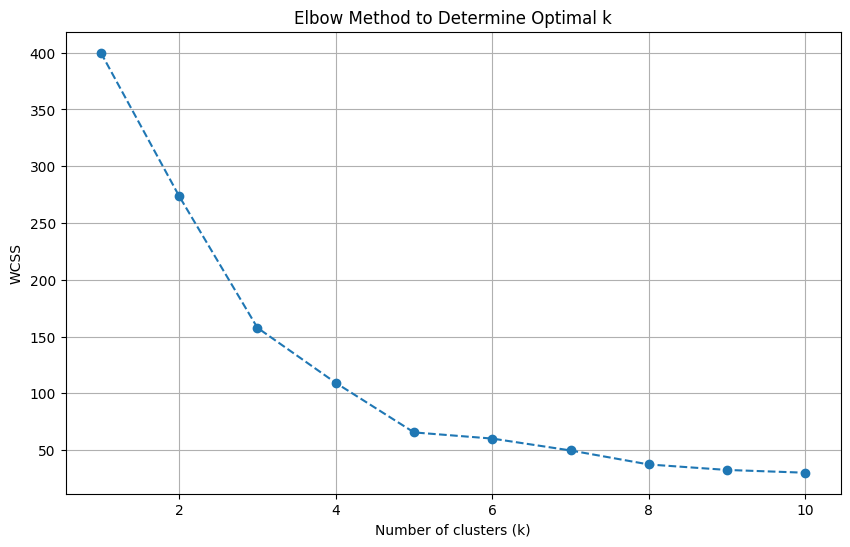

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

#**➔	Build k-Means Model:**

◆	Construct the k-Means model using the optimal k-value determined in the previous step.


In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
# Add the cluster labels to the dataframe
df['Cluster'] = y_kmeans
df['Cluster'].head()

,Cluster
0,4
1,2
2,4
3,2
4,4


◆	Identify the clusters and centroids from the model.

In [ ]:
# 1. Cluster labels for each customer
cluster_labels = kmeans.labels_

In [ ]:
# 2. Centroids of each cluster
centroids = kmeans.cluster_centers_

In [ ]:
# Display cluster centroids
for i, center in enumerate(centroids):
    print(f"Cluster {i}: Annual Income = {center[0]:.2f}, Spending Score = {center[1]:.2f}")

Cluster 0: Annual Income = 55.30, Spending Score = 49.52
Cluster 1: Annual Income = 86.54, Spending Score = 82.13
Cluster 2: Annual Income = 25.73, Spending Score = 79.36
Cluster 3: Annual Income = 88.20, Spending Score = 17.11
Cluster 4: Annual Income = 26.30, Spending Score = 20.91


➔	Visualization of Clusters: Plot the scatter plot again, this time including the centroids. Color the data points according to their respective clusters to visualize the clustering results effectively

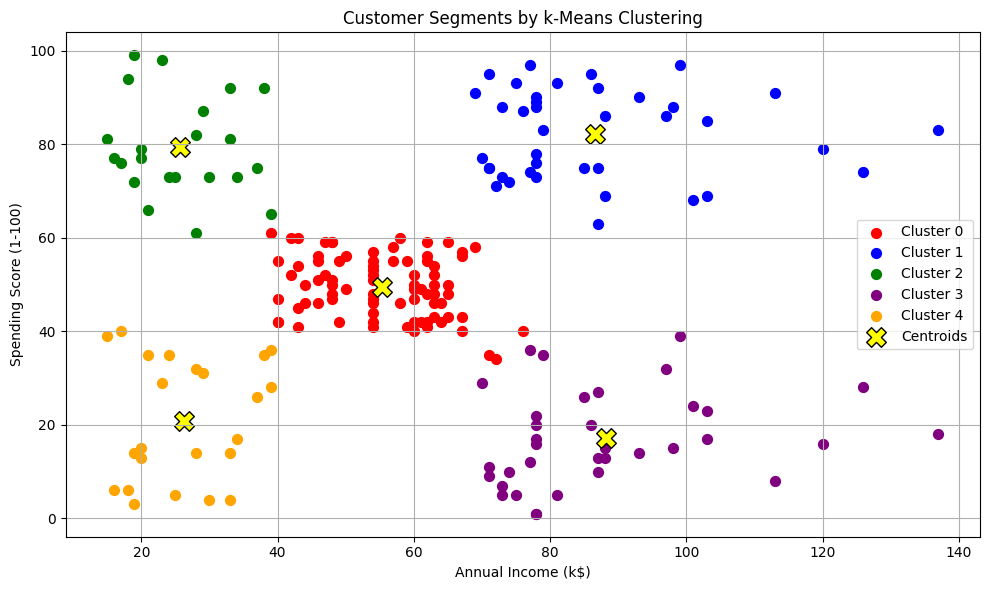

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i in range(5):
    plt.scatter(
        df[df['Cluster'] == i]['Annual Income (k$)'],
        df[df['Cluster'] == i]['Spending Score (1-100)'],
        s=50, c=colors[i], label=f'Cluster {i}')

# Plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='yellow', label='Centroids', marker='X', edgecolor='black')

plt.title('Customer Segments by k-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()